In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\varan\Desktop\Downloads\led.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [3]:
data.drop(['Population'],axis=1,inplace=True)

In [4]:
data.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

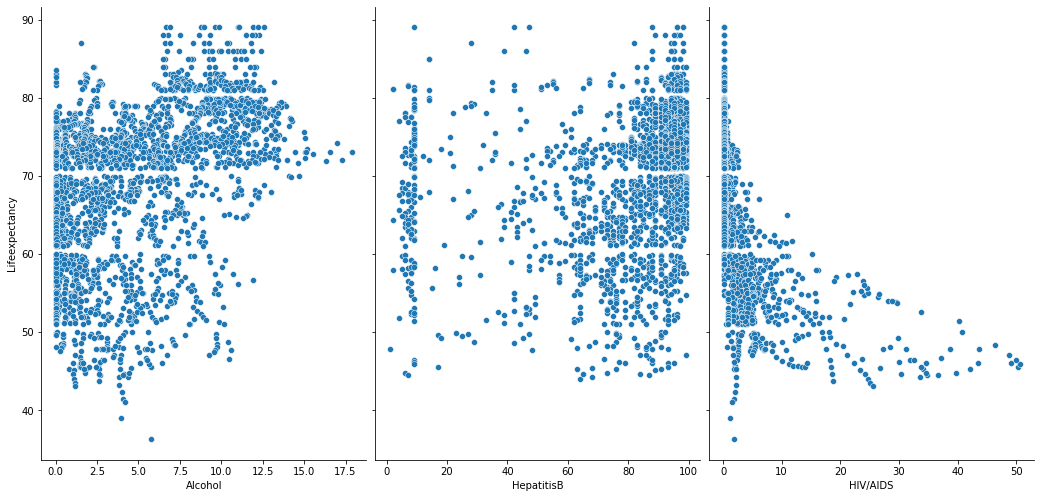

In [5]:
sns.pairplot(data,x_vars=['Alcohol','HepatitisB','HIV/AIDS'],y_vars=['Lifeexpectancy'],height=7,aspect=0.7)

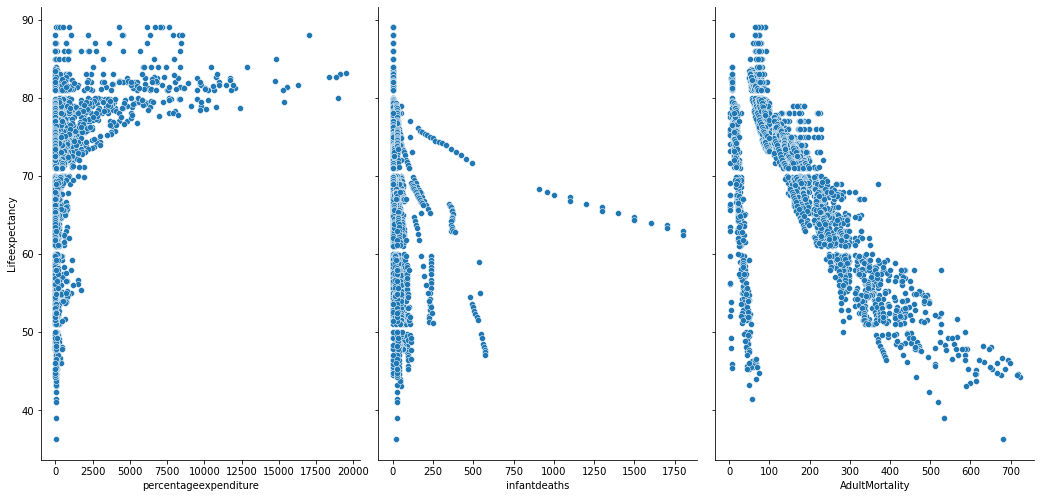

In [6]:
sns.pairplot(data,x_vars=['percentageexpenditure','infantdeaths','AdultMortality'],y_vars=['Lifeexpectancy'],height=7,aspect=0.7)

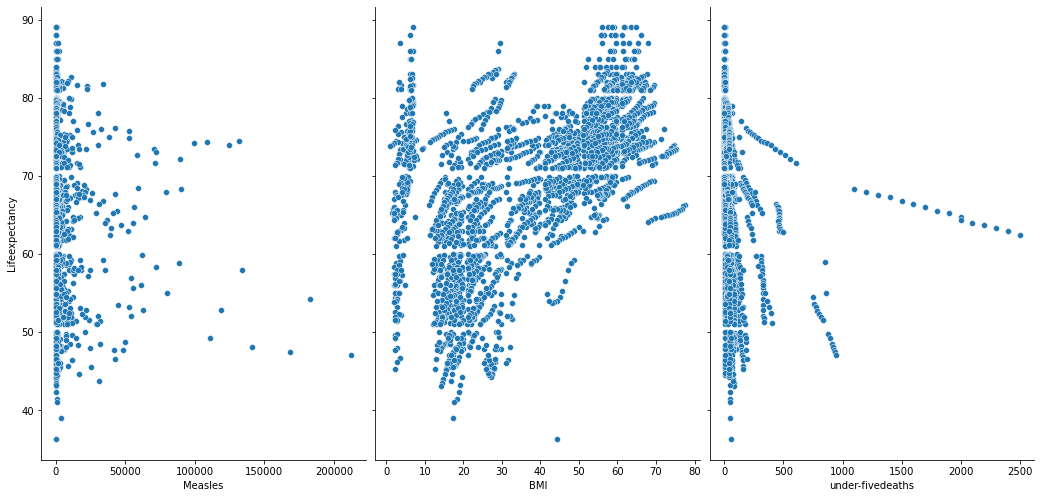

In [7]:
sns.pairplot(data,x_vars=['Measles','BMI','under-fivedeaths'],y_vars=['Lifeexpectancy'],height=7,aspect=0.7)

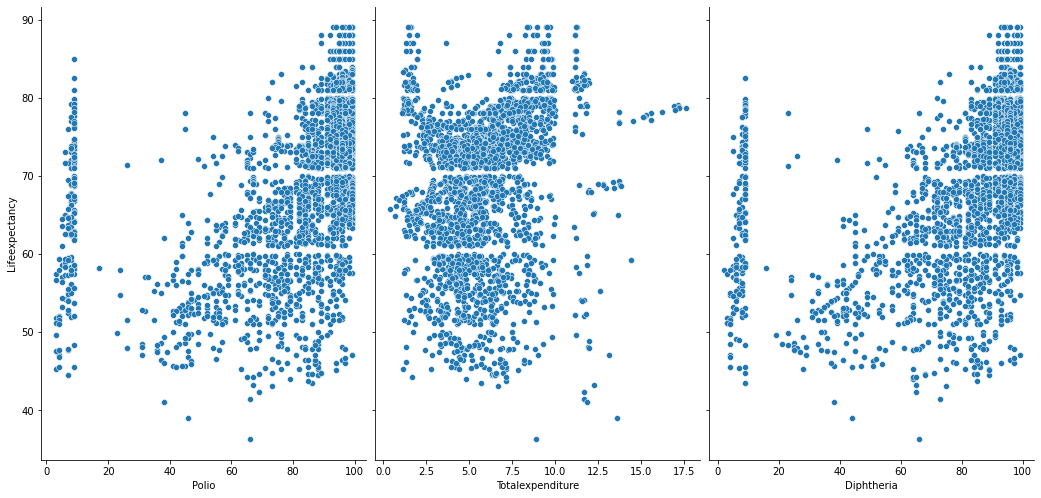

In [8]:
sns.pairplot(data,x_vars=['Polio','Totalexpenditure','Diphtheria'],y_vars=['Lifeexpectancy'],height=7,aspect=0.7)

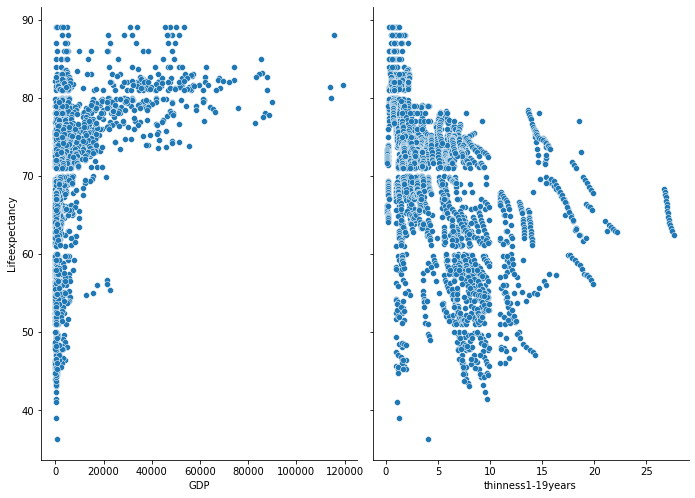

In [9]:
sns.pairplot(data,x_vars=['GDP','thinness1-19years'],y_vars=['Lifeexpectancy'],height=7,aspect=0.7)

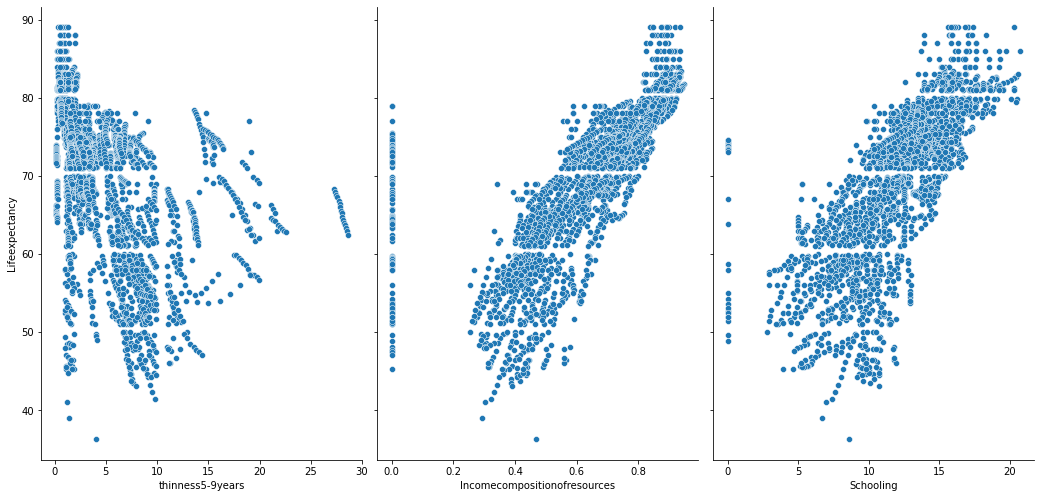

In [10]:
sns.pairplot(data,x_vars=['thinness5-9years','Incomecompositionofresources','Schooling'],y_vars=['Lifeexpectancy'],height=7,aspect=0.7)

In [11]:
HIV_AIDS = pd.DataFrame({"HIV/AIDS":data['HIV/AIDS'],
                    "Lifeexpectancy":data['Lifeexpectancy']})
BMI = pd.DataFrame({"BMI":data['BMI'],
                    "Lifeexpectancy":data['Lifeexpectancy']}) 

In [12]:
BMI.isnull().sum()

BMI               34
Lifeexpectancy    10
dtype: int64

In [13]:
BMI.dropna(how='any',inplace=True)
BMI.isnull().sum()

BMI               0
Lifeexpectancy    0
dtype: int64

# LINEAR REGRESSION

In [14]:
X = BMI['BMI'].values
Y = BMI['Lifeexpectancy'].values
#X = HIV_AIDS['HIV/AIDS'].values
#Y = HIV_AIDS['Lifeexpectancy'].values

# Least Square Method

In [15]:
mean_of_x = np.mean(X)
mean_of_y = np.mean(Y)

n = 0
d = 0

for i in range(len(X)):
    n += (X[i] - mean_of_x) * (Y[i] - mean_of_y)
    d += (X[i] - mean_of_x) **2

m = n / d
c = mean_of_y - (m*mean_of_x)

print(m,c)

0.26985797632742864 59.032495593458805


In [16]:
y_pred = c+m*X
y_pred

array([64.18678294, 64.05185395, 63.91692496, ..., 66.12976037,
       66.02181718, 65.91387399])

Text(0, 0.5, 'Life_Expectency')

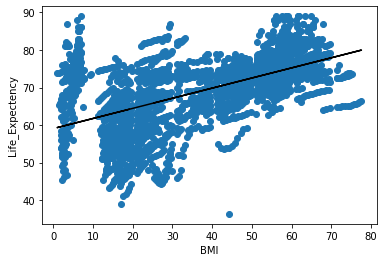

In [17]:
plt.scatter(X,Y)
plt.plot(X,y_pred,c="black")
plt.xlabel('BMI')
plt.ylabel('Life_Expectency')

# R squared Method

In [18]:
numerator = 0
denominator  = 0
for i in range(len(X)):
    y_pred = c+m*X[i]
    denominator += (Y[i] - mean_of_y) ** 2
    numerator += (Y[i] - y_pred) ** 2
Accurecy = 1 - (numerator/denominator)
print(Accurecy)

0.32227596392534885
